Q1) From HW4Q2, use numpy and matplotlib.pyplot to reproduce the following charts. The charts are for data
after cleaning and conversion of variables (to Kilogram and Centimeters).

In [1]:
import numpy as np
import math
import gzip
import matplotlib.pyplot as plt

In [2]:
pfile = input('Please enter the path/file to read: ')
infile = gzip.open(pfile, 'rt')#'CDBRFS08.ASC.gz'
age = []; cw = []; waya = []; ht = []; gender = [];
data = []
for line in infile:
    age += [line[100:102]]
    cw += [line[118:122]]
    ht += [line[122:126]]
    waya += [line[126:130]]        
    gender += [line[142]]

data = list(zip(age, cw, waya, ht, gender)) #put alltogether
npdata = np.array(data)         #create a Numpy array

#delete missing or invalid data (rows) for cw, waya, and height
dRows,_ = np.where(np.logical_or(np.logical_or(npdata=='    ', npdata=='9999'), npdata=='7777'))
npdata = np.delete(npdata, dRows, axis=0)
#delete missing or invalid data for age
dRows,_ = np.where(np.logical_or(npdata=='09', npdata=='07'))
npdata = np.delete(npdata, dRows, axis=0)
#convert npdata into a float array
npdata = npdata.astype('float64')
#delete more invalid data for height
dRows = np.where(np.logical_and(npdata[:,3]>711, npdata[:,3]<9000))
npdata = np.delete(npdata, dRows, axis=0)

#convert current weight to kilogram except for 9000 - 9998 entries
npdata[npdata[:,1]<9000,1] /= 2.2
npdata[npdata[:,1]>=9000,1] -= 9000
#convert weight a year ago to kilogram, except for 9000-9998 entries
npdata[npdata[:,2]<9000,2] /= 2.2
npdata[npdata[:,2]>=9000, 2] -= 9000
#convert height to centimeters, except for 9000-9998
npdata[npdata[:,3]<9000, 3] = np.trunc(np.trunc(npdata[npdata[:,3]<9000, 3]/100) * 30.48 + npdata[npdata[:,3]<9000, 3] %100 * 2.54 +0.5)
npdata[npdata[:,3]>=9000, 3] -= 9000
npdata.round(1, npdata)     #round all entries to 1 decimal point

Please enter the path/file to read: CDBRFS08.ASC.gz


array([[ 39. ,  88.6,  88.6, 180. ,   1. ],
       [ 64. ,  75. ,  84.5, 155. ,   2. ],
       [ 51. , 100. , 100. , 183. ,   1. ],
       ...,
       [ 18. ,  68.2,  63.6, 178. ,   1. ],
       [ 42. ,  90.5,  90.9, 163. ,   1. ],
       [ 75. ,  59.1,  63.6, 165. ,   2. ]])

a) (10 points/5 points) Pie chart for the number of males and females participating in the study. Colors
used are hotpink and royalblue. Use parameter labeldistance=0.3 to move the label inside.

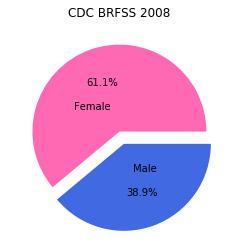

In [3]:
male = npdata[npdata[:,4] == 1]
female = npdata[npdata[:,4] == 2]
x = [len(female), len(male)]
c = ['hotpink', 'royalblue']
l = ['Female', 'Male']
explode = [0,.15]
plt.pie(x, explode = explode, colors = c, labels = l, autopct = '%1.1f%%', labeldistance = 0.3)
plt.title('CDC BRFSS 2008')
plt.show()

b) (10 points/5 points) Histograms for age distribution.

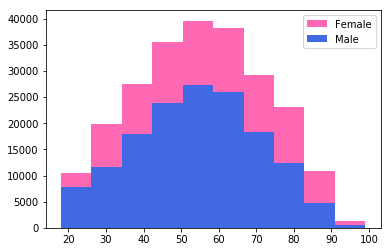

In [4]:
maleAge = male[:,0]
femaleAge = female[:,0]
plt.hist([maleAge, femaleAge], histtype = 'stepfilled', color = ['royalblue', 'hotpink'])
labels = ['Female', 'Male']
plt.legend(labels)
plt.show()

c) (10 points/ 5 points) Box plots for CW and WAYA

([<matplotlib.axis.YTick at 0x18a79d4fef0>,
 <a list of 4 Text yticklabel objects>)

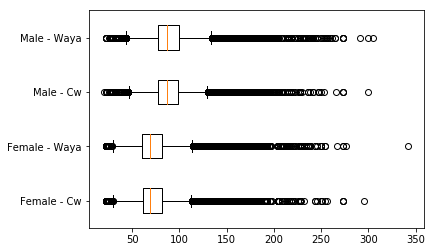

In [5]:
maleWAYA = male[:,2]
maleCW = male[:,1]
femaleWAYA = female[:,2]
femaleCW = female[:,1]

plt.boxplot([femaleCW, femaleWAYA, maleCW, maleWAYA], vert=False)
plt.yticks([1,2,3,4],['Female - Cw','Female - Waya','Male - Cw','Male - Waya'])

d) (25 points/ 12.5 points) Bar chart to show the percentage of people who gained, lost, or had unchanged
weight from last year to current year.

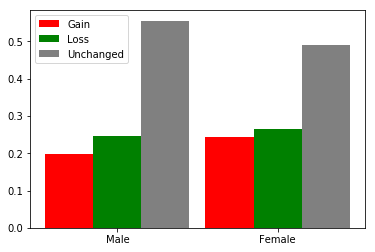

In [6]:
xCoord = np.array([1,2])
xTicks = ['Male', 'Female']
male_weightDelta = male[:,1] - male[:,2]
female_weightDelta = female[:,1] - female[:,2]
male_loss = len(male_weightDelta[male_weightDelta < 0])
male_gain = len(male_weightDelta[male_weightDelta > 0])
male_unchanged = len(male_weightDelta[male_weightDelta == 0])
female_loss = len(female_weightDelta[female_weightDelta < 0])
female_gain = len(female_weightDelta[female_weightDelta > 0])
female_unchanged = len(female_weightDelta[female_weightDelta == 0])
gainData = [male_gain/len(male), female_gain/len(female)]
lossData = [male_loss/len(male), female_loss/len(female)]
unchangedData = [male_unchanged/len(male), female_unchanged/len(female)]
plt.bar(xCoord, gainData, width = 0.3, color = 'r', label = 'Gain')
plt.bar(xCoord + 0.3, lossData, width = 0.3, color = 'g', label = 'Loss')
plt.bar(xCoord + 0.6, unchangedData, width = 0.3, color = 'grey', label = 'Unchanged')
plt.xticks(xCoord + 0.3, xTicks)
plt.legend(loc=0)
plt.show()

e) (45 points/ 22.5 points) A grid consists of height and current weight distributions and the scatter chart.
To move yticks to the right, use ax.yaxis.tick_right() and to move the ticks inside the plot, use
ax.tick_params(axis="y",direction="in", pad=-25).

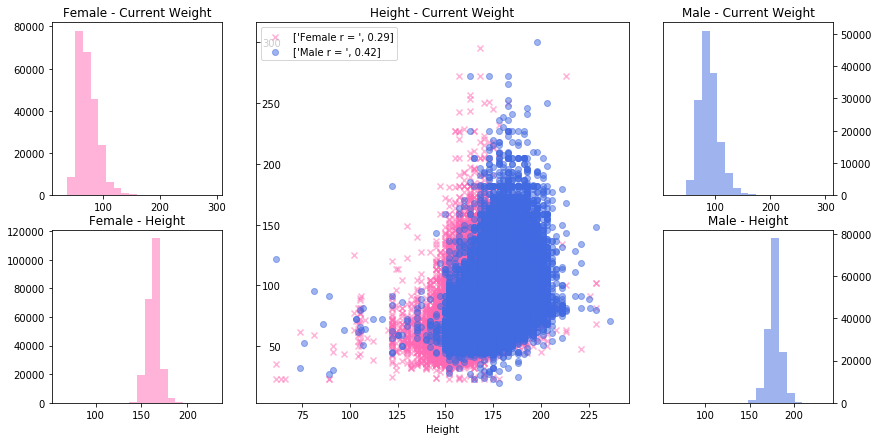

In [7]:
maleCW = male[:,1]
femaleCW = female[:,1]
maleHeight = male[:,3]
femaleHeight = female[:,3]

figure = plt.figure(figsize=(14,7))
ax1 = plt.subplot2grid((2,4),(0,0))
ax1.hist(femaleCW, histtype = "stepfilled", color = "hotpink", alpha = 0.5, bins = 20)
plt.title("Female - Current Weight")
ax2 = plt.subplot2grid((2,4),(0,1), rowspan = 2, colspan = 2)

mCV = np.round((np.corrcoef(maleHeight, maleCW)[0,1]),2)
fCV = np.round((np.corrcoef(femaleHeight, femaleCW)[0,1]),2)

plt.scatter(femaleHeight, femaleCW, color = "hotpink", marker = "x", alpha = 0.5, label = ["Female r = ", fCV])
plt.scatter(maleHeight, maleCW, color = "royalblue", alpha = 0.5, label = ["Male r = ", mCV])
plt.legend()
plt.xlabel("Height")
plt.title("Height - Current Weight")
ax2 = plt.tick_params(axis = "y", direction = "in", pad = -25)
ax3 = plt.subplot2grid((2,4), (1,0))

ax3.hist(femaleHeight, histtype = "stepfilled", color = "hotpink", alpha = 0.5, bins = 20)
plt.title("Female - Height")
ax4 = plt.subplot2grid((2,4), (0,3))
ax4.hist(maleCW, histtype = "stepfilled", color = "royalblue", alpha = 0.5, bins = 20)
plt.title("Male - Current Weight")
ax4.yaxis.tick_right()
ax5 = plt.subplot2grid((2,4), (1,3))
ax5.hist(maleHeight, histtype = "stepfilled", color = "royalblue", alpha = 0.5, bins = 20)
plt.title("Male - Height")
ax5.yaxis.tick_right()

Graduate Students Only
Use the dataset provided (gapminder_lifeExp_gdp) to reproduce the following plots. Use numpy and
matplotlib.pyplot. First, remove all entries for Oceania. You may use the following structured data type:
dt = {'names':('country', 'year', 'pop', 'continent', 'lifeExp', 'gdp'), 'formats':('U25',np.int16, np.float, 'U10',
np.float, np.float)}

Q2) (50 points)

In [8]:
dt = {'names':('country', 'year', 'pop', 'continent', 'lifeExp', 'gdp'), 
      'formats':('U25',np.int16, np.float, 'U10', np.float, np.float)}
npdata = np.loadtxt("gapminder_lifeExp_gdp.csv",skiprows=1,dtype=dt, delimiter=',')
dRows = np.where(npdata['continent']=='Oceania')
npdata = np.delete(npdata,dRows)

a) (20 points) Stacked bar chart and a pie chart (as subplots) for world population

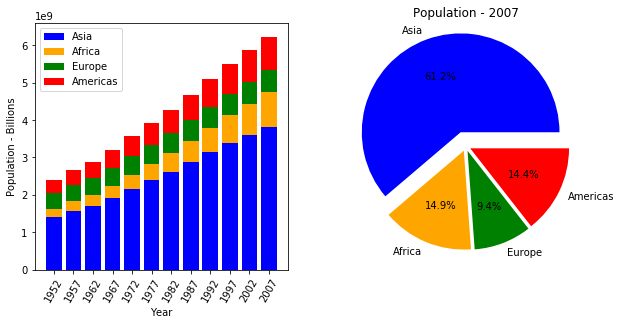

In [9]:
xCoord = ['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992', '1997', '2002', '2007']

asia_1952 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1952)]
asia_1957 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1957)]
asia_1962 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1962)]
asia_1967 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1967)]
asia_1972 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1972)]
asia_1977 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1977)]
asia_1982 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1982)]
asia_1987 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1987)]
asia_1992 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1992)]
asia_1997 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==1997)]
asia_2002 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==2002)]
asia_2007 = npdata[np.logical_and(npdata['continent']=='Asia', npdata['year']==2007)]

europe_1952 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1952)]
europe_1957 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1957)]
europe_1962 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1962)]
europe_1967 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1967)]
europe_1972 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1972)]
europe_1977 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1977)]
europe_1982 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1982)]
europe_1987 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1987)]
europe_1992 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1992)]
europe_1997 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==1997)]
europe_2002 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==2002)]
europe_2007 = npdata[np.logical_and(npdata['continent']=='Europe', npdata['year']==2007)]

americas_1952 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1952)]
americas_1957 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1957)]
americas_1962 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1962)]
americas_1967 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1967)]
americas_1972 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1972)]
americas_1977 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1977)]
americas_1982 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1982)]
americas_1987 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1987)]
americas_1992 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1992)]
americas_1997 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==1997)]
americas_2002 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==2002)]
americas_2007 = npdata[np.logical_and(npdata['continent']=='Americas', npdata['year']==2007)]

africa_1952 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1952)]
africa_1957 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1957)]
africa_1962 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1962)]
africa_1967 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1967)]
africa_1972 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1972)]
africa_1977 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1977)]
africa_1982 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1982)]
africa_1987 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1987)]
africa_1992 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1992)]
africa_1997 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==1997)]
africa_2002 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==2002)]
africa_2007 = npdata[np.logical_and(npdata['continent']=='Africa', npdata['year']==2007)]

asia = [(asia_1952['pop']).sum(), (asia_1957['pop']).sum(), (asia_1962['pop']).sum(), (asia_1967['pop']).sum(), 
        (asia_1972['pop']).sum(),(asia_1977['pop']).sum(), (asia_1982['pop']).sum(), (asia_1987['pop']).sum(), 
        (asia_1992['pop']).sum(), (asia_1997['pop']).sum(), (asia_2002['pop']).sum(), (asia_2007['pop']).sum()]
europe = [(europe_1952['pop']).sum(), (europe_1957['pop']).sum(), (europe_1962['pop']).sum(), (europe_1967['pop']).sum(), 
          (europe_1972['pop']).sum(),(europe_1977['pop']).sum(), (europe_1982['pop']).sum(), (europe_1987['pop']).sum(), 
          (europe_1992['pop']).sum(), (europe_1997['pop']).sum(), (europe_2002['pop']).sum(), (europe_2007['pop']).sum()]
americas = [(americas_1952['pop']).sum(), (americas_1957['pop']).sum(), (americas_1962['pop']).sum(), (americas_1967['pop']).sum(), 
            (americas_1972['pop']).sum(),(americas_1977['pop']).sum(), (americas_1982['pop']).sum(), (americas_1987['pop']).sum(), 
            (americas_1992['pop']).sum(), (americas_1997['pop']).sum(), (americas_2002['pop']).sum(), (americas_2007['pop']).sum()]
africa = [(africa_1952['pop']).sum(), (africa_1957['pop']).sum(), (africa_1962['pop']).sum(), (africa_1967['pop']).sum(), 
          (africa_1972['pop']).sum(),(africa_1977['pop']).sum(), (africa_1982['pop']).sum(), (africa_1987['pop']).sum(), 
          (africa_1992['pop']).sum(), (africa_1997['pop']).sum(), (africa_2002['pop']).sum(), (africa_2007['pop']).sum()]

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.bar(xCoord, asia, color = 'blue')
plt.bar(xCoord, africa, bottom = np.array(asia), color = 'orange')
plt.bar(xCoord, europe, bottom=np.array(asia)+np.array(africa), color = 'green')
plt.bar(xCoord, americas, bottom=np.array(asia)+np.array(africa)+np.array(europe), color = 'red')
plt.xticks(rotation=60)
plt.legend(('Asia', 'Africa', 'Europe', 'Americas'))
plt.ylim([0,6600000000])
plt.xlabel('Year')
plt.ylabel('Population - Billions')

plt.subplot(2, 2, 2)
lenAsia = (asia_2007['pop']).sum()
lenAfrica = (africa_2007['pop']).sum()
lenAmericas = (americas_2007['pop']).sum()
lenEurope = (europe_2007['pop']).sum()
x = [lenAsia, lenAfrica, lenEurope, lenAmericas]
c = ['blue', 'orange', 'green', 'red']
l = ['Asia', 'Africa', 'Europe', 'Americas']
explode = [0.15, 0.05, 0.05, 0.05]
plt.pie(x, explode = explode, colors = c, labels = l, autopct = '%1.1f%%')
plt.title('Population - 2007')
plt.show()

b) (15 points) Mean of life expectancy over years in each continent

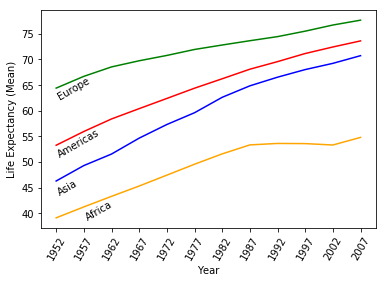

In [10]:
asiaLifeExpMean = [asia_1952['lifeExp'].mean(), asia_1957['lifeExp'].mean(), asia_1962['lifeExp'].mean(), asia_1967['lifeExp'].mean(), 
                   asia_1972['lifeExp'].mean(), asia_1977['lifeExp'].mean(), asia_1982['lifeExp'].mean(), asia_1987['lifeExp'].mean(), 
                   asia_1992['lifeExp'].mean(), asia_1997['lifeExp'].mean(), asia_2002['lifeExp'].mean(), asia_2007['lifeExp'].mean()]
europeLifeExpMean = [europe_1952['lifeExp'].mean(), europe_1957['lifeExp'].mean(), europe_1962['lifeExp'].mean(), europe_1967['lifeExp'].mean(), 
                     europe_1972['lifeExp'].mean(), europe_1977['lifeExp'].mean(), europe_1982['lifeExp'].mean(), europe_1987['lifeExp'].mean(), 
                     europe_1992['lifeExp'].mean(), europe_1997['lifeExp'].mean(), europe_2002['lifeExp'].mean(), europe_2007['lifeExp'].mean()]
americasLifeExpMean = [americas_1952['lifeExp'].mean(), americas_1957['lifeExp'].mean(), americas_1962['lifeExp'].mean(), americas_1967['lifeExp'].mean(), 
                       americas_1972['lifeExp'].mean(), americas_1977['lifeExp'].mean(), americas_1982['lifeExp'].mean(), americas_1987['lifeExp'].mean(), 
                       americas_1992['lifeExp'].mean(), americas_1997['lifeExp'].mean(), americas_2002['lifeExp'].mean(),americas_2007['lifeExp'].mean()]
africaLifeExpMean = [africa_1952['lifeExp'].mean(), africa_1957['lifeExp'].mean(), africa_1962['lifeExp'].mean(), africa_1967['lifeExp'].mean(), 
                     africa_1972['lifeExp'].mean(), africa_1977['lifeExp'].mean(), africa_1982['lifeExp'].mean(), africa_1987['lifeExp'].mean(), 
                     africa_1992['lifeExp'].mean(), africa_1997['lifeExp'].mean(), africa_2002['lifeExp'].mean(), africa_2007['lifeExp'].mean()]

plt.xlabel('Year')
plt.ylabel('Life Expectancy (Mean)')
plt.plot(xCoord, asiaLifeExpMean, color='blue')
plt.plot(europeLifeExpMean, color='green')
plt.plot(americasLifeExpMean, color='red')
plt.plot(africaLifeExpMean, color='orange')
plt.xticks(rotation=60)
plt.annotate('Asia', xy =(0, asiaLifeExpMean[0]-1), rotation = 30)
plt.annotate('Europe', xy =(0, europeLifeExpMean[0]+1), rotation = 30)
plt.annotate('Africa', xy =(1, africaLifeExpMean[0]+2), rotation = 30)
plt.annotate('Americas', xy =(0, americasLifeExpMean[0]+2), rotation = 30)
plt.show()

c) (15 points) The trend of life expectancy over years for four countries (USA, Germany, Egypt, and China).

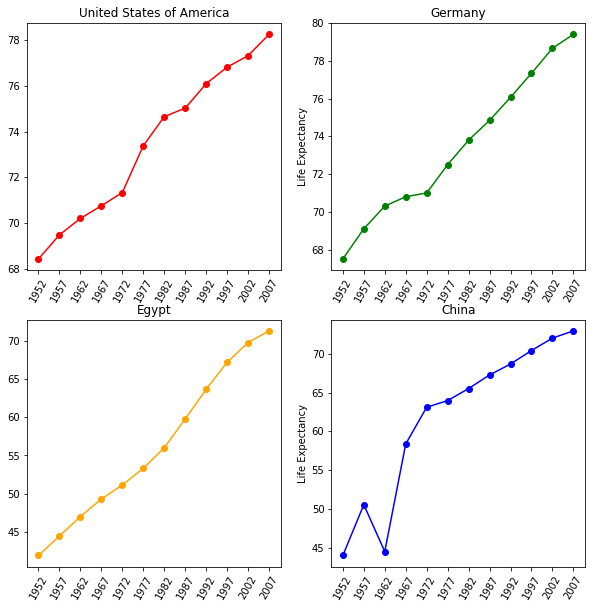

In [11]:
xCoord = np.array(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992', '1997', '2002', '2007'])

usa_1952 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1952)]
usa_1957 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1957)]
usa_1962 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1962)]
usa_1967 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1967)]
usa_1972 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1972)]
usa_1977 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1977)]
usa_1982 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1982)]
usa_1987 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1987)]
usa_1992 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1992)]
usa_1997 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==1997)]
usa_2002 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==2002)]
usa_2007 = npdata[np.logical_and(npdata['country']=='United States', npdata['year']==2007)]

ger_1952 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1952)]
ger_1957 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1957)]
ger_1962 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1962)]
ger_1967 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1967)]
ger_1972 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1972)]
ger_1977 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1977)]
ger_1982 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1982)]
ger_1987 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1987)]
ger_1992 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1992)]
ger_1997 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==1997)]
ger_2002 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==2002)]
ger_2007 = npdata[np.logical_and(npdata['country']=='Germany', npdata['year']==2007)]

egypt_1952 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1952)]
egypt_1957 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1957)]
egypt_1962 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1962)]
egypt_1967 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1967)]
egypt_1972 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1972)]
egypt_1977 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1977)]
egypt_1982 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1982)]
egypt_1987 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1987)]
egypt_1992 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1992)]
egypt_1997 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==1997)]
egypt_2002 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==2002)]
egypt_2007 = npdata[np.logical_and(npdata['country']=='Egypt', npdata['year']==2007)]

china_1952 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1952)]
china_1957 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1957)]
china_1962 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1962)]
china_1967 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1967)]
china_1972 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1972)]
china_1977 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1977)]
china_1982 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1982)]
china_1987 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1987)]
china_1992 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1992)]
china_1997 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==1997)]
china_2002 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==2002)]
china_2007 = npdata[np.logical_and(npdata['country']=='China', npdata['year']==2007)]

usaLifeExpMean = [usa_1952['lifeExp'], usa_1957['lifeExp'], usa_1962['lifeExp'], usa_1967['lifeExp'], 
                       usa_1972['lifeExp'], usa_1977['lifeExp'], usa_1982['lifeExp'], usa_1987['lifeExp'], 
                       usa_1992['lifeExp'], usa_1997['lifeExp'], usa_2002['lifeExp'], usa_2007['lifeExp']]
gerLifeExpMean = [ger_1952['lifeExp'], ger_1957['lifeExp'], ger_1962['lifeExp'], ger_1967['lifeExp'], 
                       ger_1972['lifeExp'], ger_1977['lifeExp'], ger_1982['lifeExp'], ger_1987['lifeExp'], 
                       ger_1992['lifeExp'], ger_1997['lifeExp'], ger_2002['lifeExp'], ger_2007['lifeExp']]
egyptLifeExpMean = [egypt_1952['lifeExp'], egypt_1957['lifeExp'], egypt_1962['lifeExp'], egypt_1967['lifeExp'], 
                       egypt_1972['lifeExp'], egypt_1977['lifeExp'], egypt_1982['lifeExp'], egypt_1987['lifeExp'], 
                       egypt_1992['lifeExp'], egypt_1997['lifeExp'], egypt_2002['lifeExp'], egypt_2007['lifeExp']]
chinaLifeExpMean = [china_1952['lifeExp'], china_1957['lifeExp'], china_1962['lifeExp'], china_1967['lifeExp'], 
                       china_1972['lifeExp'], china_1977['lifeExp'], china_1982['lifeExp'], china_1987['lifeExp'], 
                       china_1992['lifeExp'], china_1997['lifeExp'], china_2002['lifeExp'], china_2007['lifeExp']]

years = np.unique(npdata['year'])

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.title("United States of America")
plt.plot(xCoord, usaLifeExpMean, color='red', marker='o')
plt.xticks(xCoord,years)
plt.xticks(rotation=60)
plt.subplot(2, 2, 2)
plt.title("Germany")
plt.plot(xCoord, gerLifeExpMean, color = 'green', marker='o')
plt.xticks(xCoord,years)
plt.xticks(rotation=60)
plt.ylabel('Life Expectancy')
plt.subplot(2, 2, 3)
plt.title("Egypt")
plt.plot(xCoord, egyptLifeExpMean, color = 'orange', marker='o')
plt.xticks(xCoord,years)
plt.xticks(rotation=60)
plt.subplot(2, 2, 4)
plt.title("China")
plt.plot(xCoord, chinaLifeExpMean, color = 'blue', marker='o')
plt.xticks(rotation=60)
plt.ylabel('Life Expectancy')
plt.show()